In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('gutenberg')
nltk.download('udhr')
nltk.download('brown')
nltk.download('reuters')
nltk.download('inaugural')
nltk.download('nps_chat')
from nltk.corpus import movie_reviews
from nltk.corpus import gutenberg
from nltk.corpus import udhr
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import inaugural
from nltk.corpus import nps_chat

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package udhr to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\udhr.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\sheen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping cor

In [2]:
print("Movie Reviews Corpus:")
print("Number of reviews:", len(movie_reviews.fileids()))
print("Categories:", movie_reviews.categories(), "\n")
print("Gutenberg Corpus:")
print("Number of texts:", len(gutenberg.fileids()))
print("Sample text:", gutenberg.raw(gutenberg.fileids()[0])[:200], "\n")
print("UDHR Corpus:")
print("Number of languages:", len(udhr.fileids()))
print("Sample text in English:", udhr.raw('English-Latin1')[:200], "\n")
print("Brown Corpus:")
print("Number of categories:", len(brown.categories()))
print("Sample text from 'news' category:", brown.raw(categories='news')[:200], "\n")
print("Reuters Corpus:")
print("Number of documents:", len(reuters.fileids()))
print("Sample document:", reuters.raw(reuters.fileids()[0])[:200], "\n")
print("Inaugural Address Corpus:")
print("Number of addresses:", len(inaugural.fileids()))
print("Sample address:", inaugural.raw(inaugural.fileids()[0])[:200], "\n")
print("NPS Chat Corpus:")
print("Number of posts:", len(nps_chat.posts()))
print("Sample post:", nps_chat.posts()[0], "\n")
print("All corpora loaded successfully.")

Movie Reviews Corpus:
Number of reviews: 2000
Categories: ['neg', 'pos'] 

Gutenberg Corpus:
Number of texts: 18
Sample text: [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; an 

UDHR Corpus:
Number of languages: 310
Sample text in English: Universal Declaration of Human Rights
Preamble
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, just 

Brown Corpus:
Number of categories: 15
Sample text from 'news' category: 

	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' tha 

Reuters Corpus:
Number of documents: 10788
Sample document: ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade fric

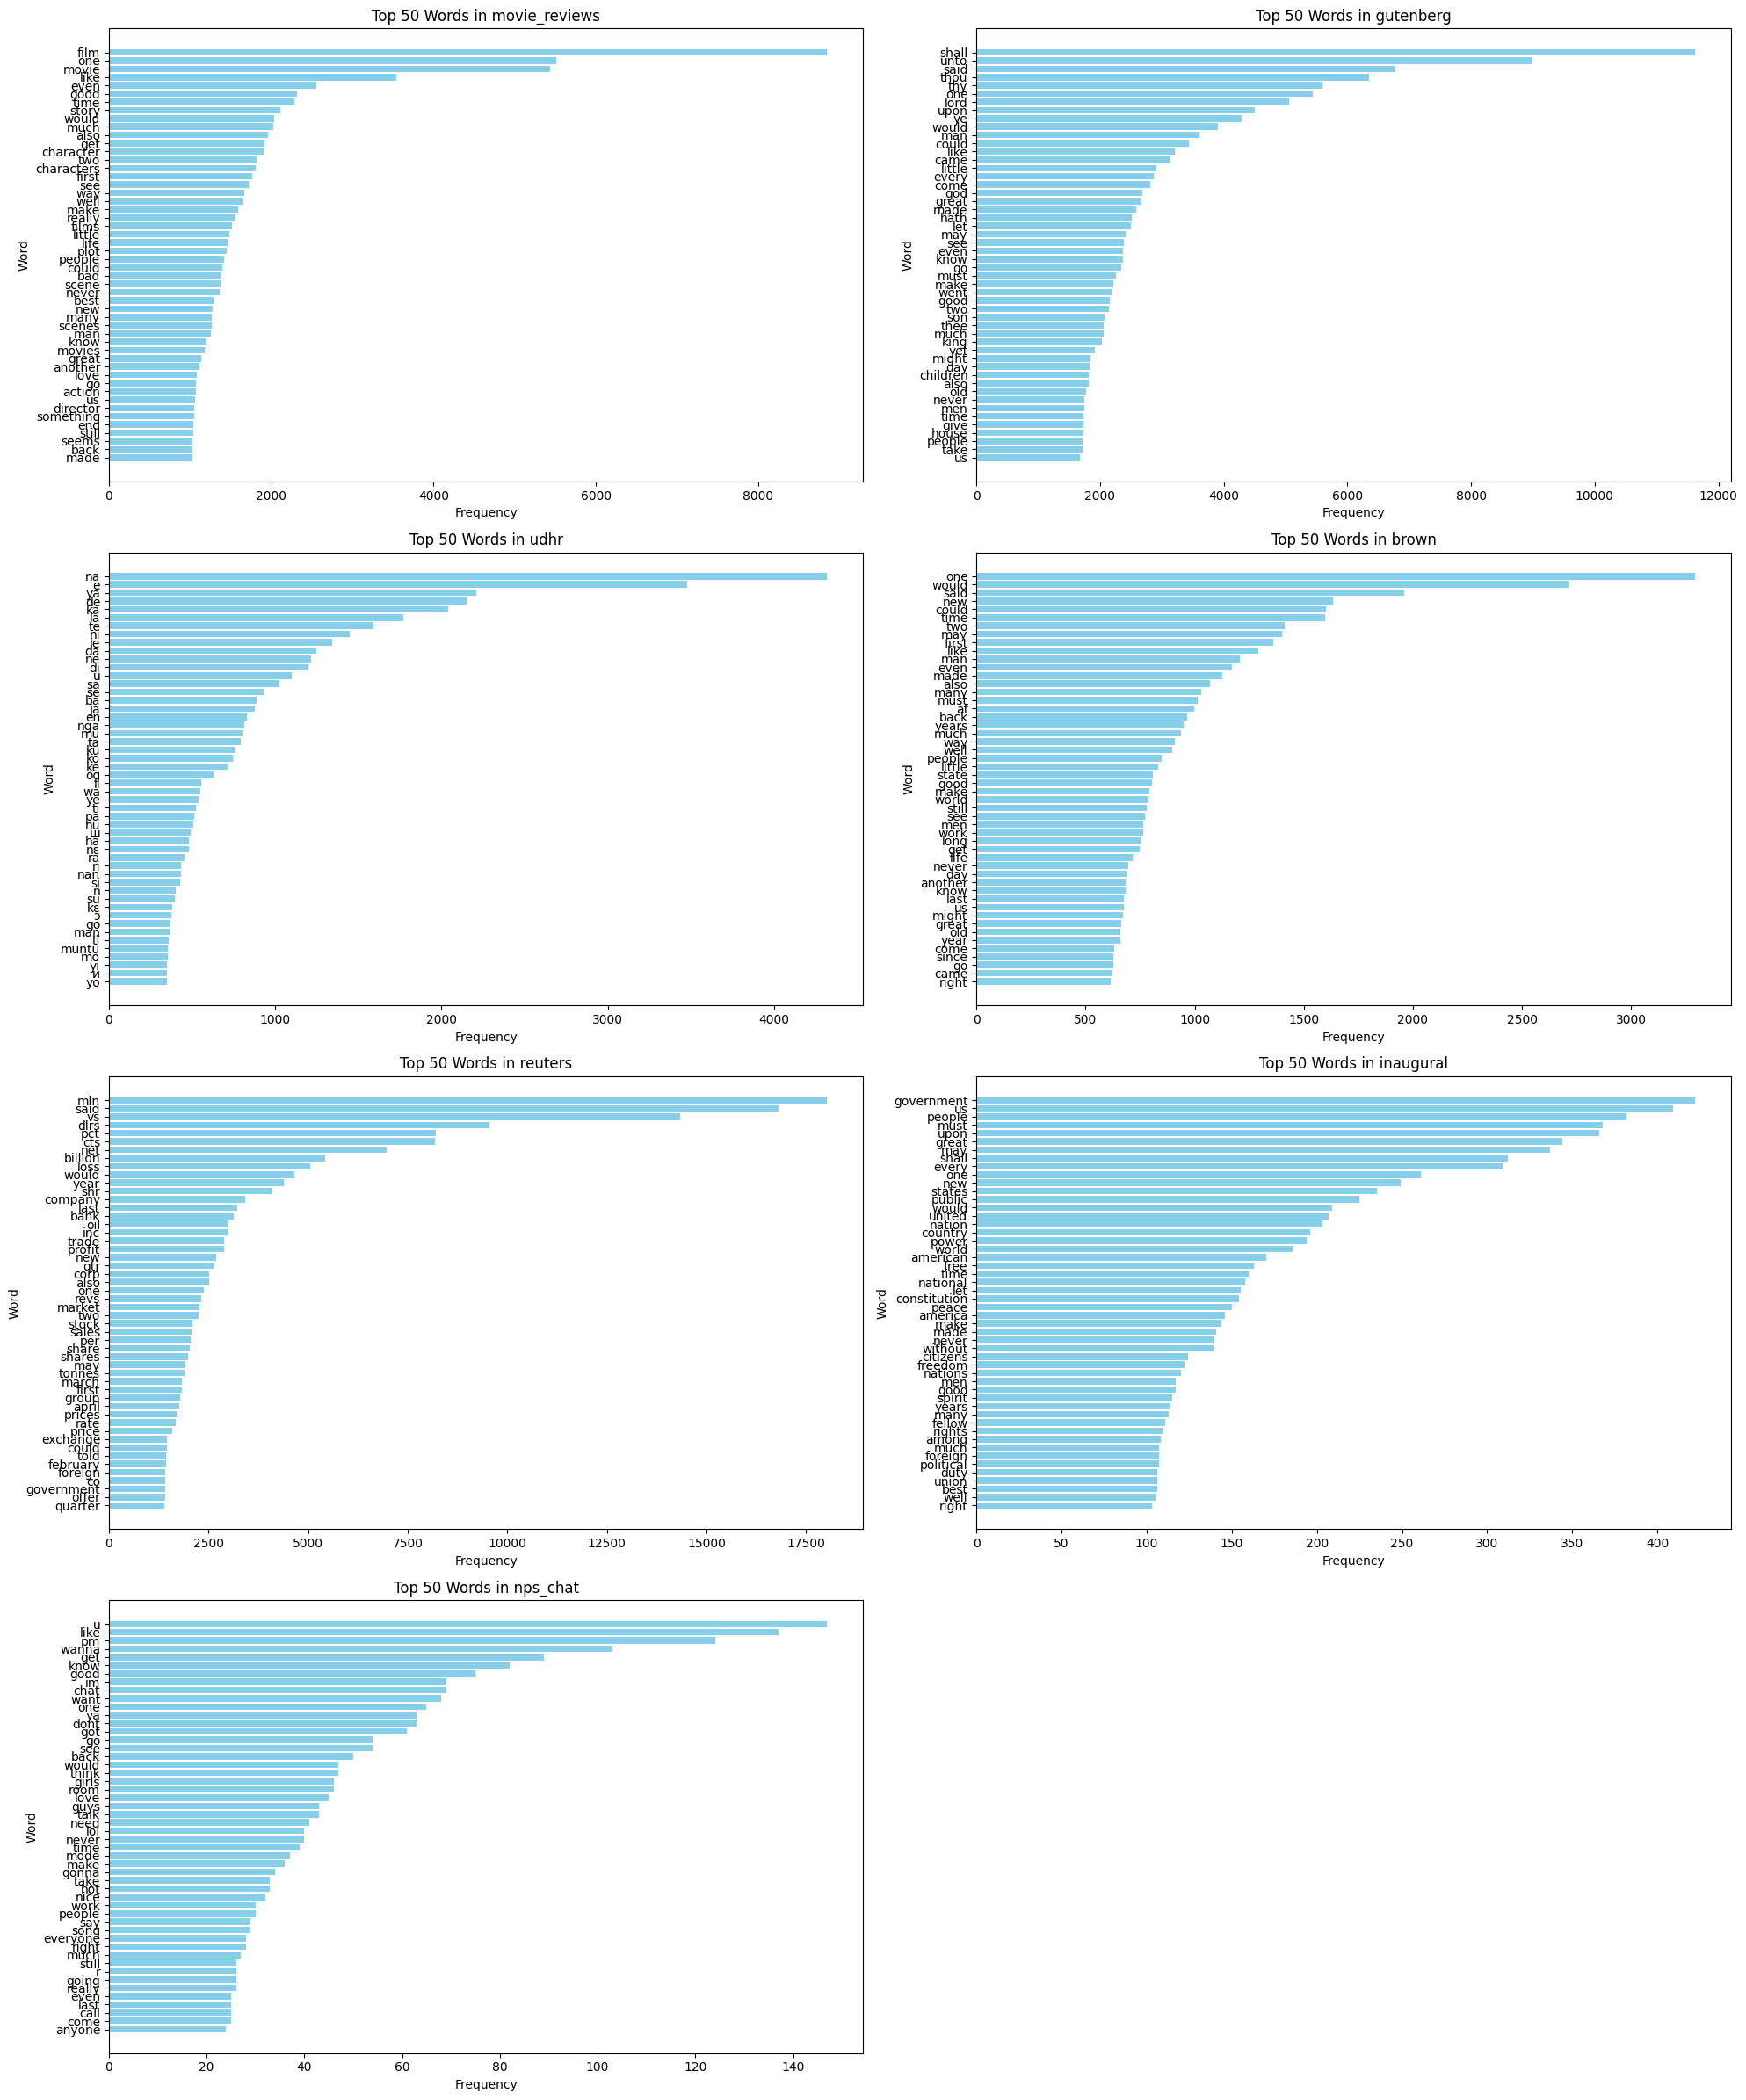

In [3]:
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, movie_reviews, gutenberg, udhr, brown, reuters, inaugural, nps_chat
from nltk import FreqDist

stop_words = set(stopwords.words('english'))

def clean_tokens(text):
    tokens = text.lower().split()
    return [word.strip(string.punctuation) for word in tokens if word.isalpha() and word not in stop_words]

corpora = {
    'movie_reviews': movie_reviews.fileids(),
    'gutenberg': gutenberg.fileids(),
    'udhr': udhr.fileids(),
    'brown': brown.fileids(),
    'reuters': reuters.fileids(),
    'inaugural': inaugural.fileids(),
    'nps_chat': nps_chat.fileids()
}

get_raw = {
    'movie_reviews': lambda fileid: movie_reviews.raw(fileid),
    'gutenberg': lambda fileid: gutenberg.raw(fileid),
    'udhr': lambda fileid: udhr.raw(fileid),
    'brown': lambda fileid: " ".join(brown.words(fileid)),
    'reuters': lambda fileid: reuters.raw(fileid),
    'inaugural': lambda fileid: inaugural.raw(fileid),
    'nps_chat': lambda fileid: nps_chat.raw(fileid)
}

fig, axs = plt.subplots(4, 2, figsize=(20, 24))
axs = axs.flatten()

for i, (name, files) in enumerate(corpora.items()):
    all_words = []
    for fileid in files:
        raw_text = get_raw[name](fileid)
        all_words.extend(clean_tokens(raw_text))

    freq_dist = FreqDist(all_words)
    most_common = freq_dist.most_common(50)

    if not most_common:
        axs[i].set_title(f"{name} (No data)")
        axs[i].axis('off')
        continue

    words, counts = zip(*most_common)
    axs[i].barh(words[::-1], counts[::-1], color='skyblue')
    axs[i].set_title(f'Top 50 Words in {name}')
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Word')

for j in range(len(corpora), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Compare the sentence lengths between the works of Austen and Shakespeare

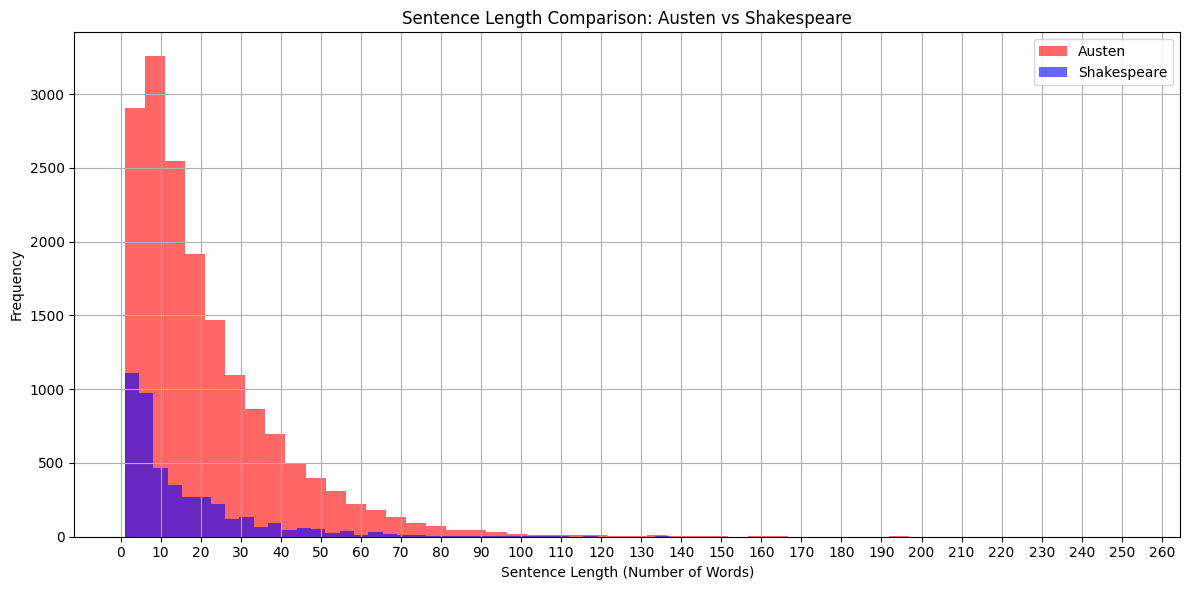

In [4]:
import numpy as np

austen_files = [fileid for fileid in gutenberg.fileids() if "austen" in fileid]
shakespeare_files = [fileid for fileid in gutenberg.fileids() if "shakespeare" in fileid]

def get_sentence_lengths(fileids):
    sentence_lengths = []
    for fileid in fileids:
        raw_text = gutenberg.raw(fileid)
        sentences = raw_text.split('.')
        for sent in sentences:
            words = sent.strip().split()
            if len(words) > 0:
                sentence_lengths.append(len(words))
    return sentence_lengths

austen_lengths = get_sentence_lengths(austen_files)
shakespeare_lengths = get_sentence_lengths(shakespeare_files)

plt.figure(figsize=(12, 6))
plt.hist(austen_lengths, bins=50, alpha=0.6, label='Austen', color='red')
plt.hist(shakespeare_lengths, bins=50, alpha=0.6, label='Shakespeare', color='blue')
plt.title("Sentence Length Comparison: Austen vs Shakespeare")
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

max_length = max(max(austen_lengths), max(shakespeare_lengths))
plt.xticks(np.arange(0, max_length + 10, 10))

plt.tight_layout()
plt.show()

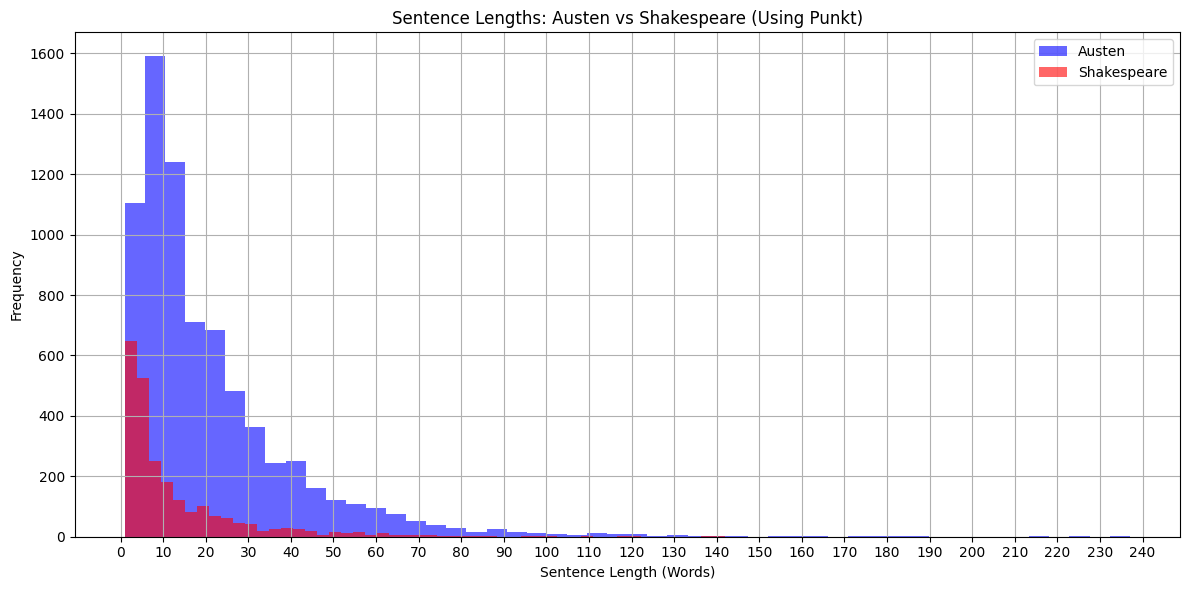

In [5]:
from nltk.tokenize import sent_tokenize

austen_text = nltk.corpus.gutenberg.raw('austen-emma.txt')
shakespeare_text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

austen_sentences = sent_tokenize(austen_text)
shakespeare_sentences = sent_tokenize(shakespeare_text)

austen_lengths = [len(sentence.split()) for sentence in austen_sentences]
shakespeare_lengths = [len(sentence.split()) for sentence in shakespeare_sentences]

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(austen_lengths, bins=50, alpha=0.6, label='Austen', color='blue')
plt.hist(shakespeare_lengths, bins=50, alpha=0.6, label='Shakespeare', color='red')
plt.title("Sentence Lengths: Austen vs Shakespeare (Using Punkt)")
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# More x-axis labels
max_len = max(max(austen_lengths), max(shakespeare_lengths))
plt.xticks(np.arange(0, max_len + 10, 10))

plt.tight_layout()
plt.show()
